In [1]:
import matplotlib.pylab as plt
import seaborn as sns

from covid.constants import Niveis
from covid.data.pt.covid import get_data
from covid.data.pt.utils import expand_data
sns.set()

In [2]:
dados_por_concelho_raw = get_data()

In [3]:
dados_por_concelho = expand_data(dados_por_concelho_raw, Niveis.CONCELHO)
dados_por_distrito = expand_data(dados_por_concelho_raw, Niveis.DISTRITO)
dados_por_nivel3 = expand_data(dados_por_concelho_raw, Niveis.NIVEL_3)
dados_por_nivel2 = expand_data(dados_por_concelho_raw, Niveis.NIVEL_2)


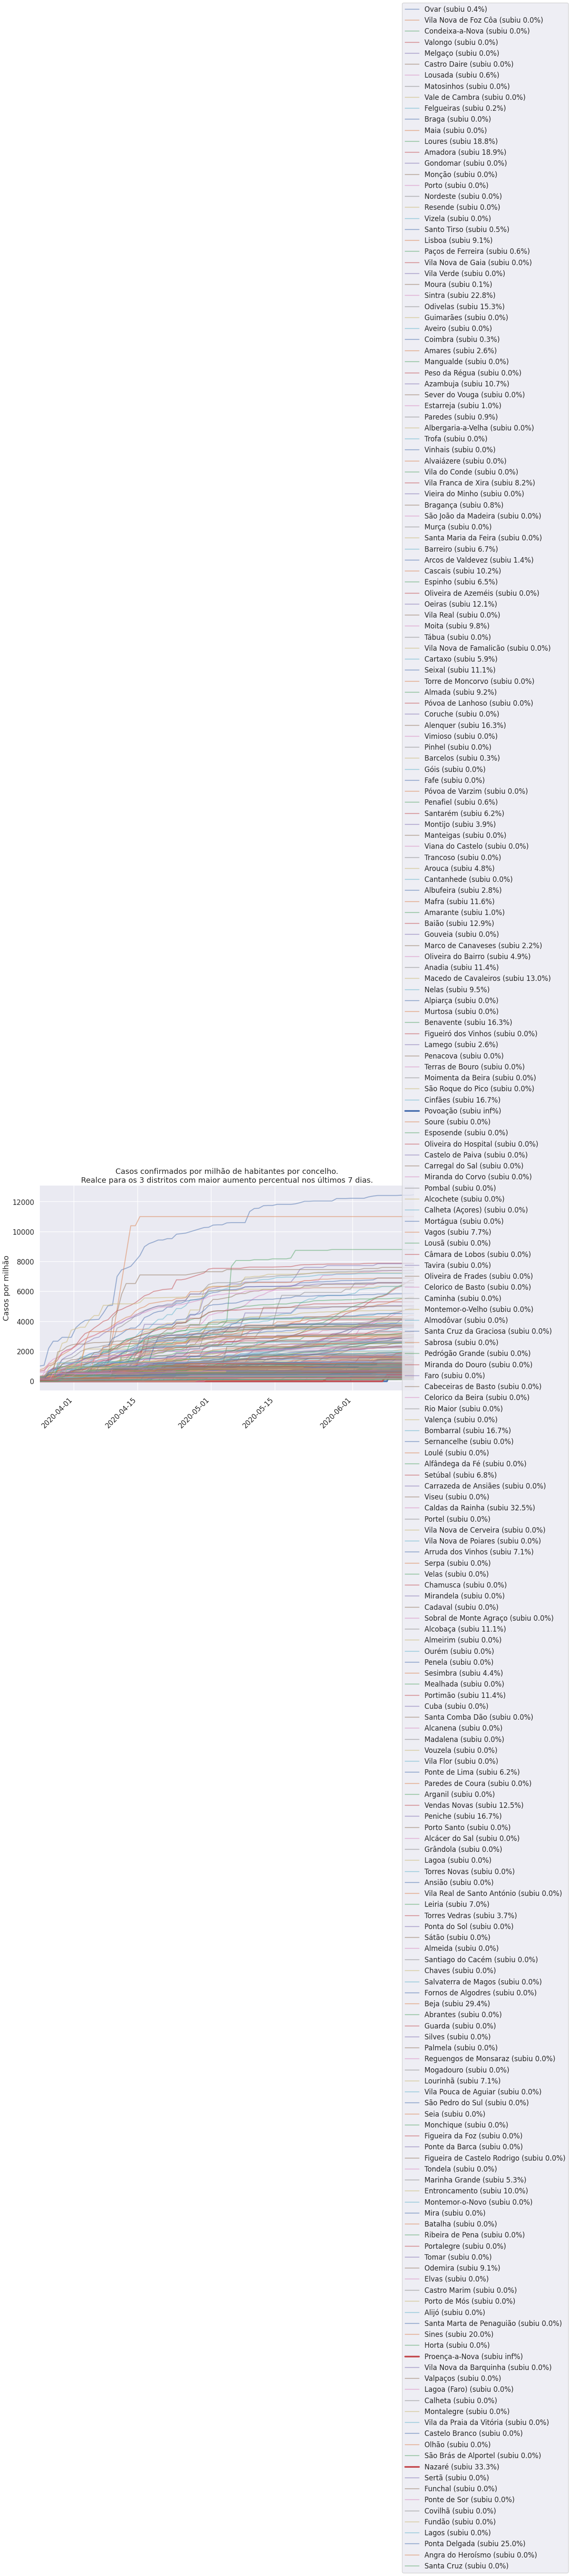

In [5]:
dados_por_concelho_sort = dados_por_concelho.iloc[-1].confirmados_por_milhao.sort_values(ascending=False).index
crescimento_semanal_concelho = ((dados_por_concelho.ConfirmadosAcumulado-dados_por_concelho.ConfirmadosAcumulado.shift(7))/dados_por_concelho.ConfirmadosAcumulado.shift(7)).iloc[-1].sort_values(ascending=False)
top_crescimento_concelho = crescimento_semanal_concelho.head(3).index
legendas_aumento = {k:f'{k} (subiu {v:.1f}%)' for k, v in (crescimento_semanal_concelho*100).to_dict().items()}

with sns.plotting_context("talk"):
    plt.figure(figsize=(16,9))
    for c in dados_por_concelho.confirmados_por_milhao[dados_por_concelho_sort]:
        if c in top_crescimento_concelho:
            plt.plot(dados_por_concelho.confirmados_por_milhao[c].fillna(0), label=legendas_aumento[c], linewidth=4)
        else:
            plt.plot(dados_por_concelho.confirmados_por_milhao[c].fillna(0), label=legendas_aumento[c], alpha=0.5)
    l = plt.legend(loc=5, bbox_to_anchor=(1.42, 0.5))
    plt.xlim((dados_por_concelho.index[0], dados_por_concelho.index[-1]))
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Casos por milhão')
    plt.title('Casos confirmados por milhão de habitantes por concelho.\n'
              'Realce para os 3 distritos com maior aumento percentual nos últimos 7 dias.')


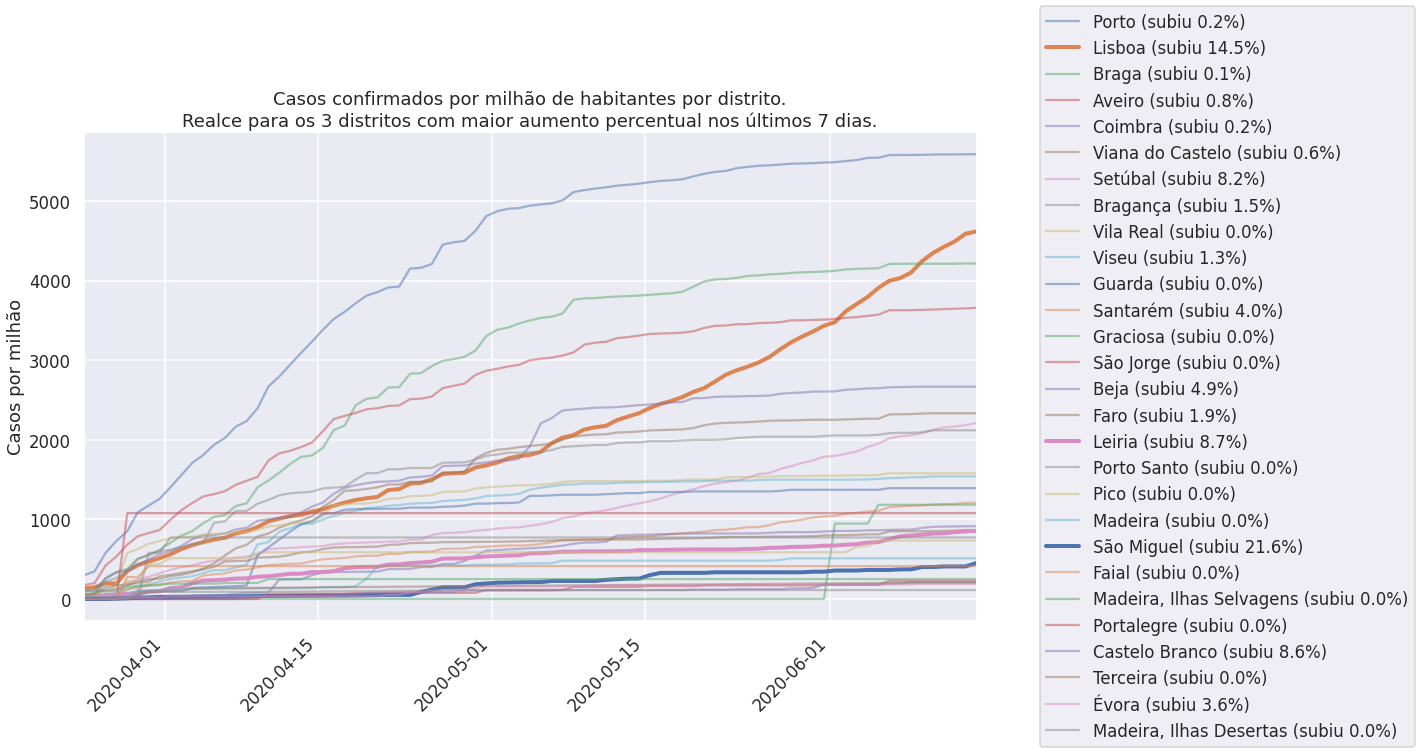

In [6]:
dados_por_distrito_sort = dados_por_distrito.iloc[-1].confirmados_por_milhao.sort_values(ascending=False).index
crescimento_semanal_distrito = ((dados_por_distrito.ConfirmadosAcumulado-dados_por_distrito.ConfirmadosAcumulado.shift(7))/dados_por_distrito.ConfirmadosAcumulado.shift(7)).iloc[-1].sort_values(ascending=False)
top_crescimento_distrito = crescimento_semanal_distrito.head(3).index
legendas_aumento = {k:f'{k} (subiu {v:.1f}%)' for k, v in (crescimento_semanal_distrito*100).to_dict().items()}

with sns.plotting_context("talk"):
    plt.figure(figsize=(16,9))
    for c in dados_por_distrito.confirmados_por_milhao[dados_por_distrito_sort]:
        if c in top_crescimento_distrito:
            plt.plot(dados_por_distrito.confirmados_por_milhao[c].fillna(0), label=legendas_aumento[c], linewidth=4)
        else:
            plt.plot(dados_por_distrito.confirmados_por_milhao[c].fillna(0), label=legendas_aumento[c], alpha=0.5)
    l = plt.legend(loc=5, bbox_to_anchor=(1.5, 0.5))
    plt.xlim((dados_por_distrito.index[0], dados_por_distrito.index[-1]))
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Casos por milhão')
    plt.title('Casos confirmados por milhão de habitantes por distrito.\n'
              'Realce para os 3 distritos com maior aumento percentual nos últimos 7 dias.')

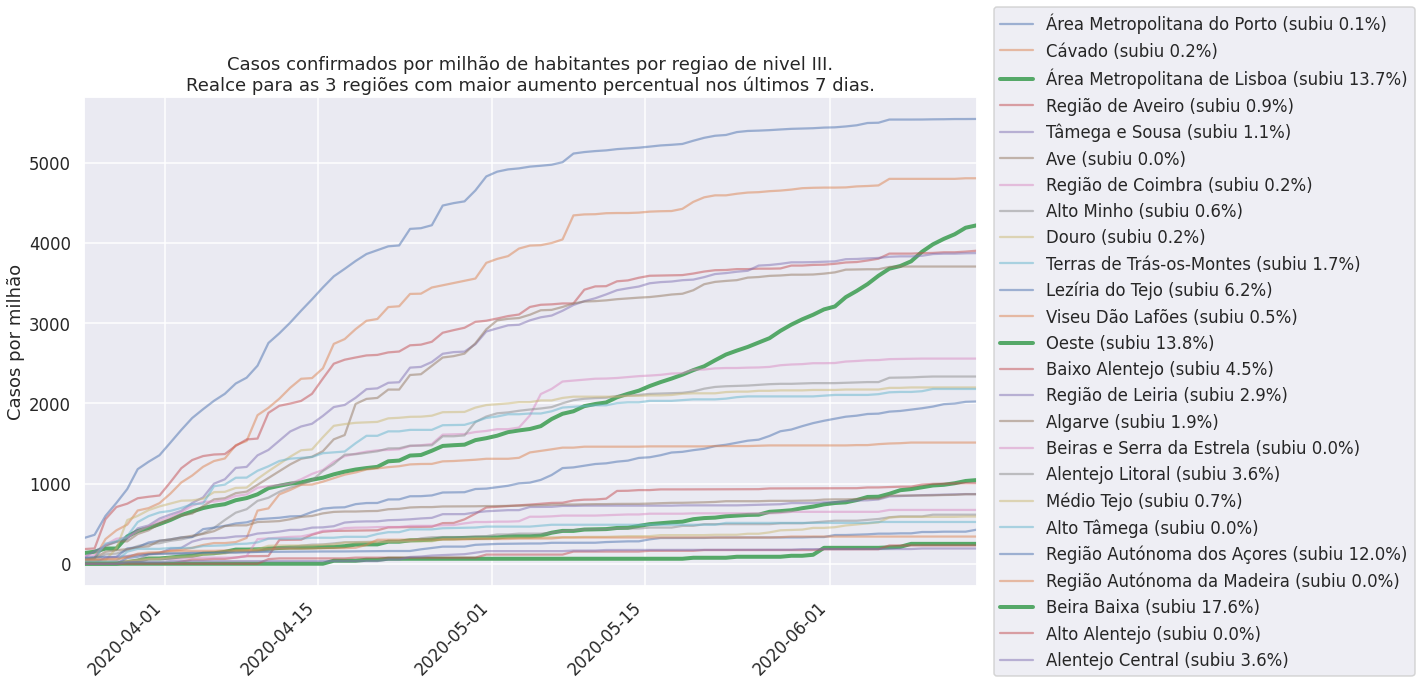

In [8]:
dados_por_nivel_3_sort = dados_por_nivel3.iloc[-1].confirmados_por_milhao.sort_values(ascending=False).index
crescimento_semanal_nivel3 = ((dados_por_nivel3.ConfirmadosAcumulado-dados_por_nivel3.ConfirmadosAcumulado.shift(7))/dados_por_nivel3.ConfirmadosAcumulado.shift(7)).iloc[-1].sort_values(ascending=False)
top_crescimento_nivel3 = crescimento_semanal_nivel3.head(3).index
legendas_aumento = {k:f'{k} (subiu {v:.1f}%)' for k, v in (crescimento_semanal_nivel3*100).to_dict().items()}

with sns.plotting_context("talk"):
    plt.figure(figsize=(16,9))
    for c in dados_por_nivel3.confirmados_por_milhao[dados_por_nivel_3_sort]:
        if c in top_crescimento_nivel3:
            plt.plot(dados_por_nivel3.confirmados_por_milhao[c], label=legendas_aumento[c], linewidth=4)
        else:
            plt.plot(dados_por_nivel3.confirmados_por_milhao[c], label=legendas_aumento[c], alpha=0.5)
    l = plt.legend(loc=5, bbox_to_anchor=(1.5, 0.5))
    plt.xlim((dados_por_nivel3.index[0], dados_por_nivel3.index[-1]))
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Casos por milhão')
    plt.title('Casos confirmados por milhão de habitantes por regiao de nivel III.\n'
              'Realce para as 3 regiões com maior aumento percentual nos últimos 7 dias.')
